# 1. Standard Scaling
`Standard scaling` is a method used to scale the data to have a mean of 0 and a standard deviation of 1.
standard scaler convert the data into the range of `-3 to 3`\
The formula for standard scaling is:
Z = (X - μ) / σ


In [78]:
# import the libraries 
import pandas as pd 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

In [79]:
# make an example dataset
df = {
    'age': [25, 30, 35, 40, 45],
    'height': [165, 170, 175, 180, 185],
    'weight': [55, 60, 65, 70, 75],
}

df = pd.DataFrame(df)
df.head()

,age,height,weight
0,25,165,55
1,30,170,60
2,35,175,65
3,40,180,70
4,45,185,75


In [80]:
# import the scaler 
# standard scaler range the values between -3 to 3 
scaler = StandardScaler()
# fit the scaler to the data and transform it
scaled_df = scaler.fit_transform(df)
scaled_df

# convert this np array to a pd dataframe 
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df

,age,height,weight
0,-1.414214,-1.414214,-1.414214
1,-0.707107,-0.707107,-0.707107
2,0.000000,0.000000,0.000000
3,0.707107,0.707107,0.707107
4,1.414214,1.414214,1.414214


# 2. Min_Max Scaler
This scaler convert all the values into the range of `0 to 1` and its formula is given below:\
Min_Max_Scaler = (X - X_min) / (X_max - X_min)

In [81]:
# import the scaler 
# standard scaler range the values between -3 to 3 
scaler = MinMaxScaler()
# fit the scaler to the data and transform it
scaled_df = scaler.fit_transform(df)
scaled_df

# convert this np array to a pd dataframe 
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df

,age,height,weight
0,0.00,0.00,0.00
1,0.25,0.25,0.25
2,0.50,0.50,0.50
3,0.75,0.75,0.75
4,1.00,1.00,1.00


# 3. Max Abs Scaler
This transform the data into the range of `-1 to 1` and its formula is given below:\
max_abs_scaler = (X - X_max) / (X_max - X_min)

In [82]:
# import the scaler 
# standard scaler range the values between -3 to 3 
scaler = MaxAbsScaler()
# fit the scaler to the data and transform it
scaled_df = scaler.fit_transform(df)
scaled_df

# convert this np array to a pd dataframe 
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df

,age,height,weight
0,0.555556,0.891892,0.733333
1,0.666667,0.918919,0.800000
2,0.777778,0.945946,0.866667
3,0.888889,0.972973,0.933333
4,1.000000,1.000000,1.000000


# 4. Robust Scaler
Robust Scaler is a scaling method that is more robust to outliers than the Standard Scaler.\
This scaler the data into the range of `-3 to 3`
The formula of this scaler is given below:\
robust_scaler = (X - median) / (IQR)

In [83]:
from sklearn.preprocessing import RobustScaler
# import the scaler 
# standard scaler range the values between -3 to 3 
scaler = RobustScaler()
# fit the scaler to the data and transform it
scaled_df = scaler.fit_transform(df)
scaled_df

# convert this np array to a pd dataframe 
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df

,age,height,weight
0,-1.0,-1.0,-1.0
1,-0.5,-0.5,-0.5
2,0.0,0.0,0.0
3,0.5,0.5,0.5
4,1.0,1.0,1.0


-------------------

# Transformation 

In [84]:
# Importing the libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [85]:
# Generate the non_normal data(exponential distribution)
np.random.seed(0)
df = np.random.exponential(size=1000, scale=2)
df = pd.DataFrame(df, columns=['values'])
df.head()
df.shape

(1000, 1)

<Axes: xlabel='values', ylabel='Count'>

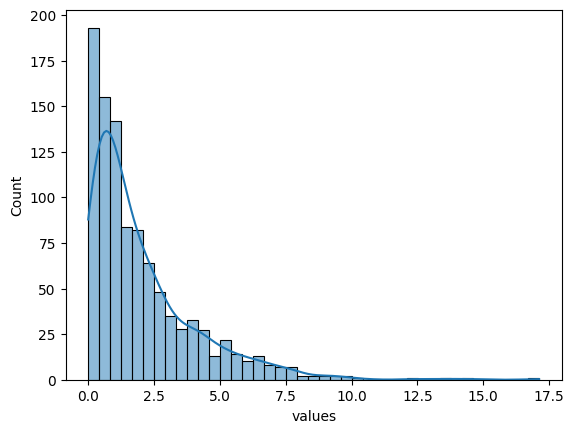

In [86]:
sns.histplot(df['values'], kde = True)  # this line is added to show the kde plot 

In [87]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

pt_boxcox = PowerTransformer(method='box-cox', standardize=True)
pt_yeo_johnson = PowerTransformer(method='yeo-johnson', standardize=True)
qt_normal = QuantileTransformer(output_distribution='normal')
 
# Boxcox must have positive values
df['boxcox'] = pt_boxcox.fit_transform(df[['values']]+1)
df['yeo_jonhson'] = pt_yeo_johnson.fit_transform(df[['values']])
df['Quantile'] = qt_normal.fit_transform(df[['values']])
df.head()

,values,boxcox,yeo_jonhson,Quantile
0,1.591749,0.179335,0.179335,0.162552
1,2.511862,0.677331,0.677331,0.587964
2,1.846446,0.339698,0.339698,0.286135
3,1.574402,0.167607,0.167607,0.157469
4,1.102097,-0.202107,-0.202107,-0.154930


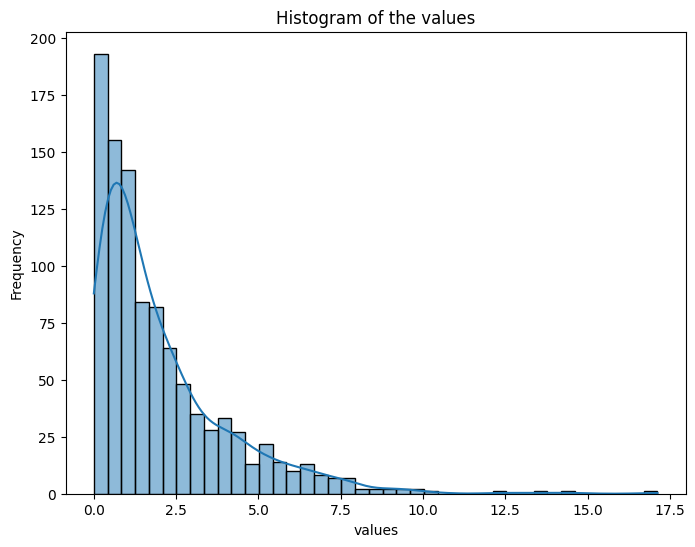

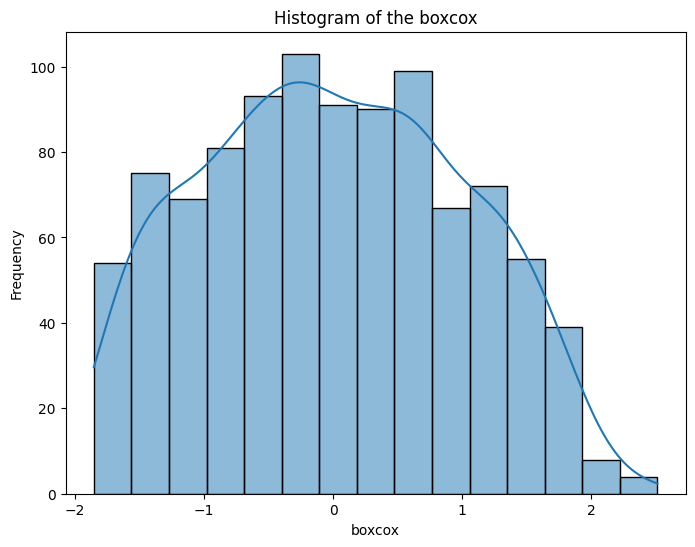

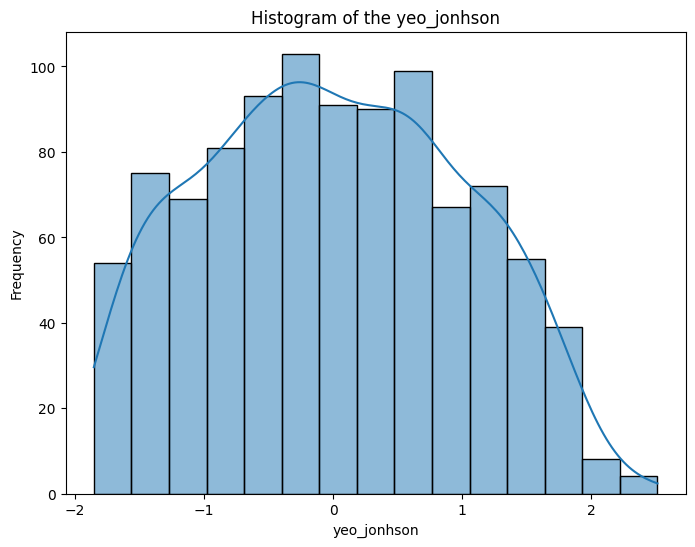

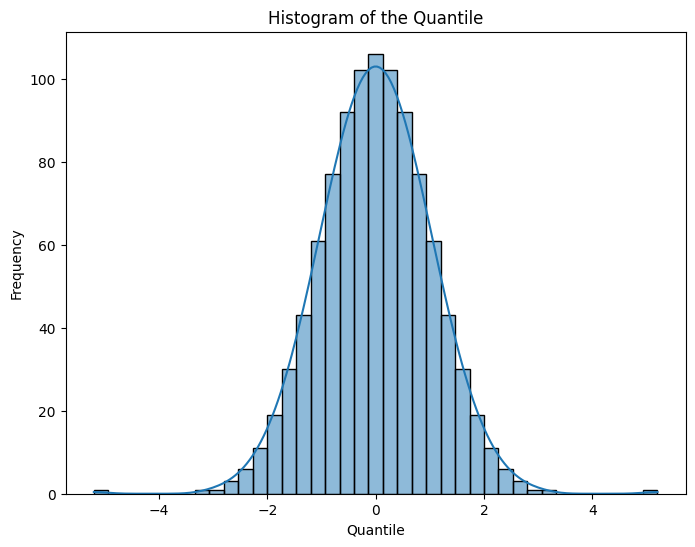

In [88]:
# create histogram for all columns using sns.hist and kde = True use  a for loop
for col in df.columns:
    plt.figure(figsize = (8,6))
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f'Histogram of the {col}')
    sns.histplot(df[col], kde = True)
    plt.show()

| Feature          | Standardization                          | Transformation                          |
|-------------------|------------------------------------------|-----------------------------------------|
| Definition        | Process of making things uniform         | Process of changing the form or appearance |
| Purpose           | To ensure consistency across datasets    | To modify data for analysis or presentation |
| Example           | Normalizing data ranges                  | Converting data types                   |

----------------

# L2 Normalization
Rescales each sample (row) to have unit norm. This type of normalization is often used when dealing with the text data. The l2 norm is calculated as the square root of the sum of the squares of the elements in the vector.


In [89]:
from sklearn.preprocessing import Normalizer
data = [[1, 1, 1], [1, 1, 0], [1, 0, 0]]
normalizer = Normalizer(norm='l2')
print(normalizer.fit_transform(data))

[[0.57735027 0.57735027 0.57735027]
 [0.70710678 0.70710678 0.        ]
 [1.         0.         0.        ]]


# L1 Normalization 
L1 Normalization is a technique used to normalize the weights of data. It is similar to L2 normalization, but it uses the sum of the absolute values is `1` of the elements in the vector instead of the square root of the sum of the squares of the elements.

In [90]:
from sklearn.preprocessing import Normalizer
data = [[1, 1, 1], [1, 1, 0], [1, 0, 0]]
normalizer = Normalizer(norm='l1')
print(normalizer.fit_transform(data))

[[0.33333333 0.33333333 0.33333333]
 [0.5        0.5        0.        ]
 [1.         0.         0.        ]]


| Feature                | L1 Normalization                     | L2 Normalization                     |
|------------------------|-------------------------------------|-------------------------------------|
| Definition         | Scales data so that the sum of absolute values equals 1 | Scales data so that the sum of squares equals 1 |
| Formula            | $$\text{L1 Norm} = \frac{x_i}{\sum_{j=1}^{n} \|x_j\|}$$         | $$\text{L2 Norm} = \frac{x_i}{\sqrt{\sum_{j=1}^{n} x_j^2}}$$  |
| Sensitivity to Outliers | High (can skew results)          | Low (more robust)                   |
| Sparsity           | Can produce sparse vectors (many zeros) | Produces dense vectors               |
| Use Cases          | Feature selection, text classification | Machine learning algorithms (e.g., SVM) |
| Geometric Interpretation | Distance in a grid-like space (Manhattan distance) | Distance in Euclidean space         |

__________
# Z-score Normalization
1. Standard Scaler
2. Min_Max Scaler

# Log Transformation

In [91]:
import pandas as pd
import numpy as np

# example dataset with skewed values
df = { "Values": [1,5,10,20,50,100,200,500,1000,2000,5000,10000,20000,50000,100000]}
df = pd.DataFrame(df)
df

,Values
0,1
1,5
2,10
3,20
4,50
5,100
6,200
7,500
8,1000
9,2000


<Axes: xlabel='Values', ylabel='Count'>

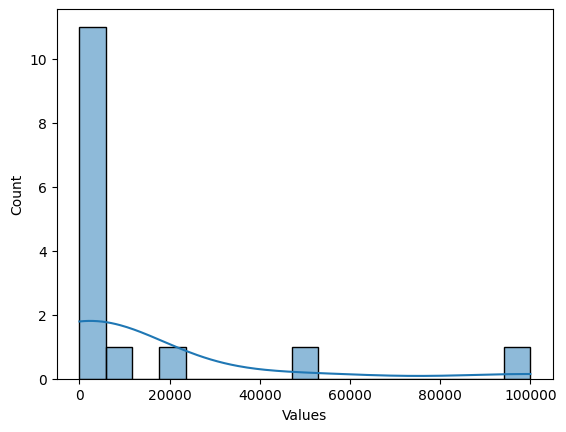

In [93]:
sns.histplot(df['Values'], kde = True)  # this line is added to show the kde plot

# Logarithmic Tranformation of values

In [96]:
df['Log10_values'] = np.log(df['Values'])
df['log2_values'] = np.log2(df['Values'])
df

,Values,Log10_values,log2_values
0,1,0.000000,0.000000
1,5,1.609438,2.321928
2,10,2.302585,3.321928
3,20,2.995732,4.321928
4,50,3.912023,5.643856
5,100,4.605170,6.643856
6,200,5.298317,7.643856
7,500,6.214608,8.965784
8,1000,6.907755,9.965784
9,2000,7.600902,10.965784


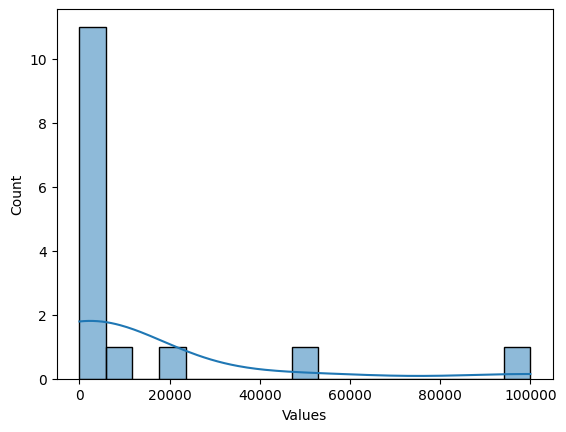

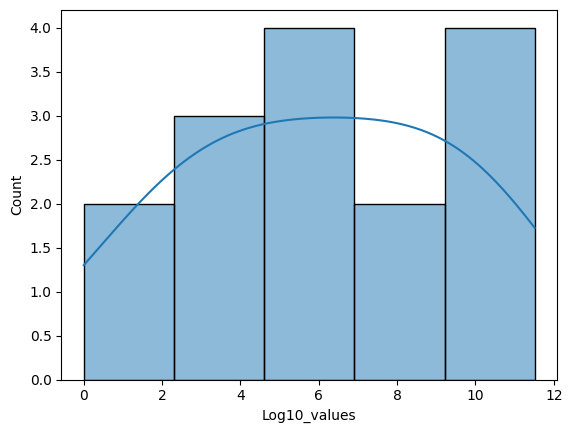

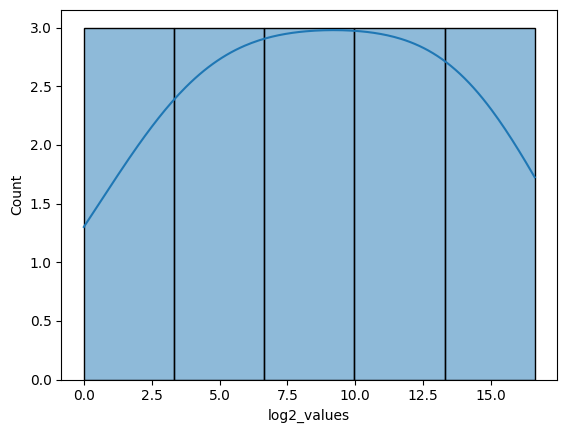

In [97]:
for col in df.columns:
    sns.histplot(df[col], kde = True)
    plt.show()

In [4]:
# this is how we can calculate the memory size of a string
name = "John"
print(f"Memory size of '{name}': {len(name.encode('ASCII'))} bytes")

Memory size of 'John': 4 bytes
